In [567]:
import datetime
import os
import yaml
import optuna
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [568]:
# Lecture du fichier d'environnement
ENV_FILE = '../env.yaml'
with open(ENV_FILE) as f:
    params = yaml.load(f) #, Loader=yaml.FullLoader)

# Initialisation des chemins vers les fichiers
ROOT_DIR = os.path.dirname(os.path.abspath(ENV_FILE))
DATA_FILE = os.path.join(ROOT_DIR,
                         params['directories']['processed'],
                         params['files']['all_data'])

# Lecture du fichier de données
epidemie_df = (pd.read_csv(DATA_FILE, parse_dates=['Last Update'])
               .assign(day=lambda _df: _df['Last Update'].dt.date)
               .drop_duplicates(subset=['Country/Region', 'Province/State', 'day'])
               [lambda df: df['day'] <= datetime.date(2020, 3, 24)]
              )

In [690]:
def get_country(country):
    return (epidemie_df[epidemie_df['Country/Region'] == country]
            .groupby(['Country/Region', 'day'])
            .agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum','Active':'sum'})
            .reset_index()
           )

# Monkey Patch pd.DataFrame
pd.DataFrame.get_country = get_country

In [695]:
get_country("South Korea").head()

,Country/Region,day,Confirmed,Deaths,Recovered,Active
0,South Korea,2020-01-22,1.0,0.0,0.0,1.0
1,South Korea,2020-01-23,1.0,0.0,0.0,1.0
2,South Korea,2020-01-24,2.0,0.0,0.0,2.0
3,South Korea,2020-01-25,2.0,0.0,0.0,2.0
4,South Korea,2020-01-26,3.0,0.0,0.0,3.0


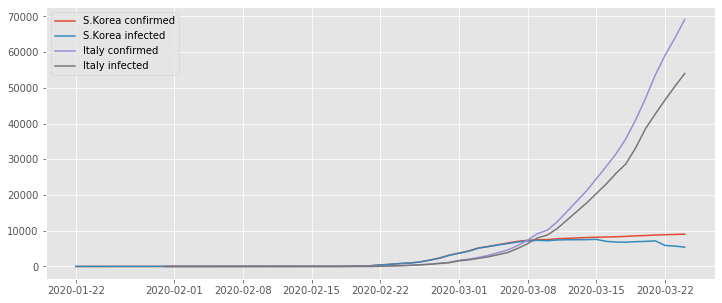

In [697]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 5))
plt.plot(korea_df['day'], korea_df['Confirmed'], label='S.Korea confirmed')
plt.plot(korea_df['day'], korea_df['Active'], label='S.Korea infected')
plt.plot(italy_df['day'], italy_df['Confirmed'], label='Italy confirmed')
plt.plot(italy_df['day'], italy_df['Active'], label='Italy infected')
plt.grid(True)
plt.legend()
plt.show()

In [52]:
import scipy.integrate as spi
import numpy as np
import pylab as plt
%matplotlib inline

In [237]:
beta=2
gamma=0.6
TS=1.0
ND=63.0
S0=51_470_000-0.01
I0=0.0000001
INPUT = (S0, I0,0)

In [238]:
def diff_eqs(INP,t):  
	Y=np.zeros((3))
	V = INP  
	Y[0] = - beta * V[0] * V[1]
	Y[1] = beta * V[0] * V[1] - gamma * V[1]
	Y[2] = gamma * V[1]
	return Y   

In [239]:
t_start = 8; t_end = ND;t_inc = TS
t_range = np.arange(t_start, t_end+t_inc,t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

Text(0, 0.5, 'Susceptibles,Recovereds and Infectious')

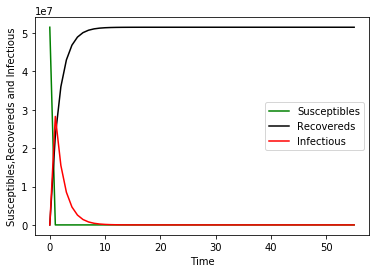

In [240]:
plt.subplot(111)
plt.plot(RES[:,0], '-g', label='Susceptibles')
plt.plot(RES[:,2], '-k', label='Recovereds')
plt.plot(RES[:,1], '-r', label='Infectious')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('Susceptibles,Recovereds and Infectious')


In [33]:
# Djiby
beta_optimal = 5.67e-3
gamma_optimal = 24.7

# PC de la fac
beta_optimal = 0.06321101
gamma_optimal = 33.06340503

# Approximation Excel
beta_optimal = 1.5485e-9
gamma_optimal = 0.1839

In [34]:
beta = beta_optimal
gamma = gamma_optimal

def SIR(t, y):
    S = y[0]
    I = y[1]
    R = y[2]
    return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

solution_korea_optimal = solve_ivp(SIR, [0, 40], [51_470_000*0.1, 1, 0], t_eval=np.arange(0, 40, 1))

In [163]:
korea_df = epidemie_df.get_country("South Korea")
korea_df.head()

,Country/Region,day,Confirmed,Deaths,Recovered
0,South Korea,2020-01-22,1.0,0.0,0.0
1,South Korea,2020-01-23,1.0,0.0,0.0
2,South Korea,2020-01-24,2.0,0.0,0.0
3,South Korea,2020-01-25,2.0,0.0,0.0
4,South Korea,2020-01-26,3.0,0.0,0.0


In [168]:
korea_df.iloc[:,1:3].head()

,day,Confirmed
0,2020-01-22,1.0
1,2020-01-23,1.0
2,2020-01-24,2.0
3,2020-01-25,2.0
4,2020-01-26,3.0


In [282]:
import numpy as np
import pandas as pd
from scipy.integrate import ode, solve_ivp

In [528]:
# Approximation Excel
beta_optimal = 1.5485e-9
gamma_optimal = 0.1839
print(beta_optimal)

1.5485e-09


In [583]:
parms = [1.5485e-08,0.05]
init = [51_470_000-1,1,0]
times = np.linspace(0,55)

In [584]:
sir_sol = solve_ivp(fun=lambda t, y: sir_ode(t, y, parms), t_span=[min(times),max(times)], y0=init, t_eval=times)

In [585]:
sir_out = pd.DataFrame({"t":sir_sol["t"],"S":sir_sol["y"][0],"I":sir_sol["y"][1],"R":sir_sol["y"][2]})

In [586]:
import matplotlib.pyplot as plt

In [587]:
plt.style.use("ggplot")

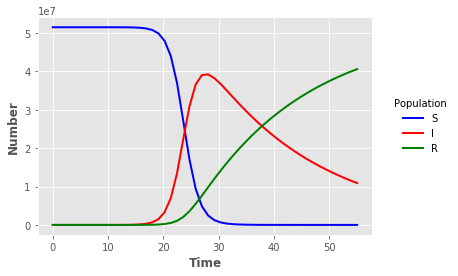

In [588]:
sline = plt.plot("t","S","",data=sir_out,color="blue",linewidth=2)
iline = plt.plot("t","I","",data=sir_out,color="red",linewidth=2)
rline = plt.plot("t","R","",data=sir_out,color="green",linewidth=2)
plt.xlabel("Time",fontweight="bold")
plt.ylabel("Number",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.25,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)

# Modeling with the South Korea case 

In [773]:
import numpy as np
import pandas as pd
from scipy.integrate import ode, solve_ivp
import matplotlib.pyplot as plt

In [774]:
PROCESSED_DIR = '../data/processed/'

In [775]:
pop_df = pd.read_csv(os.path.join(PROCESSED_DIR, 'world_population.csv'))
pop_df.columns = ['Country Name', 'Country Code','Pop']
pop_df=pop_df.drop(columns=['Country Code'])

In [776]:
def get_country(country):
    return (epidemie_df[epidemie_df['Country/Region'] == country]
            .groupby(['Country/Region', 'day'])
            .agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum','Active':'sum'})
            .reset_index()
           )

# Monkey Patch pd.DataFrame
pd.DataFrame.get_country = get_country

In [777]:
korea_df = get_country('South Korea')

In [778]:
def get_pop(country):
    return int(pop_df.loc[pop_df['Country Name']== country,['Pop']]['Pop'])

In [779]:
get_pop("South Korea")

51245707

In [780]:
active_cases = korea_df['Active']
total_population = get_pop("South Korea")
nb_steps = len(active_cases)

In [781]:
def SIR(t,y):
	S = y[0]
	I = y[1]
	R = y[2]
	return([-beta*S*I, beta*S*I-gamma*I, gamma*I])
def sumsq(p):
    beta, gamma = p
    def SIR(t,y):
        S = y[0]
        I = y[1]
        R = y[2]
        return([-beta*S*I, beta*S*I-gamma*I, gamma*I])
    sol = solve_ivp(SIR,[0,nb_steps-1],[total_population,1,0],t_eval=np.arange(0, nb_steps, 1))
    return(sum((sol.y[1]-active_cases)**2))

In [761]:
from scipy.optimize import minimize

msol = minimize(sumsq,[0.001,1],method='Nelder-Mead')
msol.x

array([4.30011016e-03, 1.77763604e+01])

In [760]:
msol.x[1]

17.77636041769123

In [782]:
beta,gamma = [1.1e-08,0.05]

In [783]:
sol = solve_ivp(SIR,[0,nb_steps-1],[total_population,1,0],t_eval=np.arange(0, nb_steps, 1))

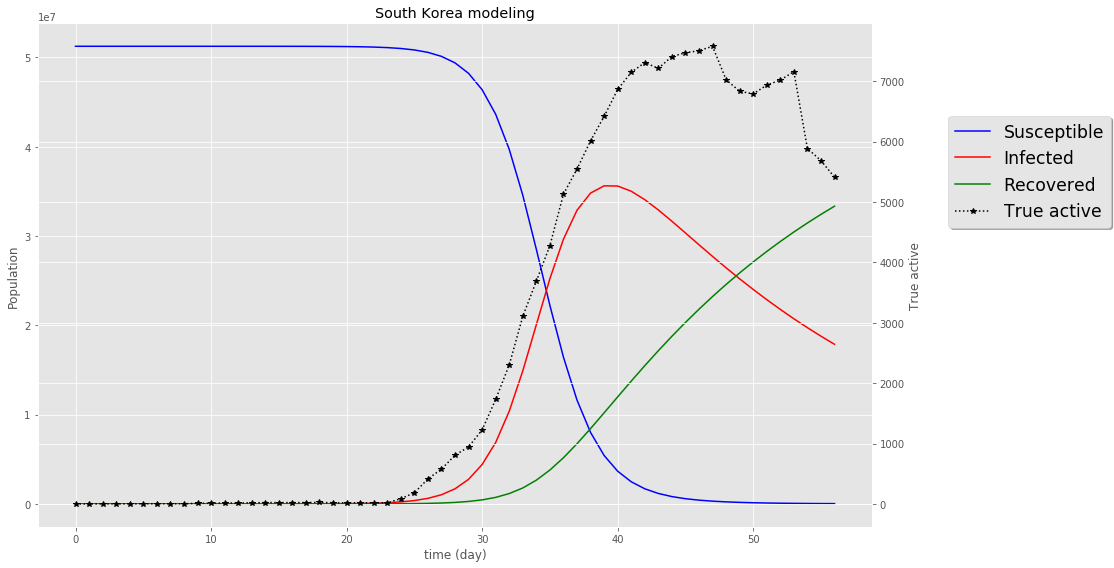

In [784]:
fig, ax1 = plt.subplots(figsize=(13,8))
#color = 'tab:red'
ax1.set_xlabel('time (day)')
ax1.set_ylabel('Population')
ax1.plot(sol.t, sol.y[0], "b-")
ax1.plot(sol.t,sol.y[1],"r-")
ax1.plot(sol.t,sol.y[2],"g-")

ax2 = ax1.twinx()

ax2.set_ylabel('True active')  # we already handled the x-label with ax1
ax2.plot(np.arange(0,len(korea_df)),korea_df['Active'],"k*:")

plt.title('South Korea modeling')

fig.legend(["Susceptible","Infected","Recovered","True active"], loc='upper center', bbox_to_anchor=(1.1, 0.8),shadow=True,fancybox=True,fontsize="xx-large")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


